In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('House.csv', encoding='latin-1')

In [3]:
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [4]:
df.shape

(35768, 10)

In [5]:
df.dtypes

City                     object
Price                   float64
Address                  object
Number_Beds               int64
Number_Baths              int64
Province                 object
Population                int64
Latitude                float64
Longitude               float64
Median_Family_Income    float64
dtype: object

In [6]:
df.columns

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')

In [7]:
df.isnull().sum()

# There is no null info.

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [8]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [9]:
import matplotlib.pyplot as plt

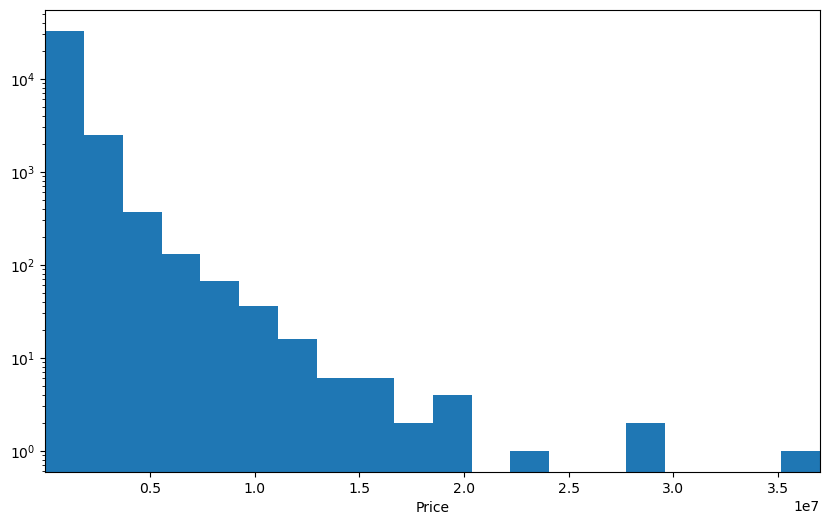

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, log=True)
plt.xlim(2150, 37000000)
plt.xlabel('Price')
plt.show()

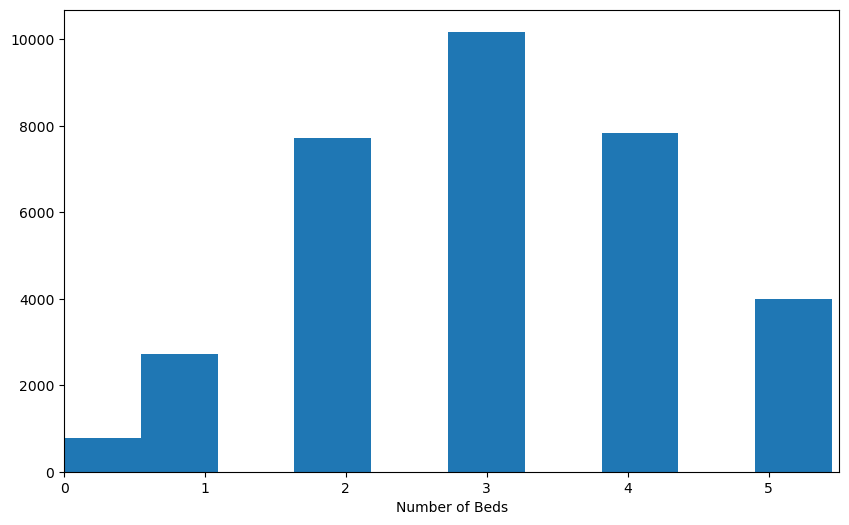

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Number_Beds'], bins=200)
plt.xlim(0, 5.5)
plt.xlabel('Number of Beds')
plt.show()

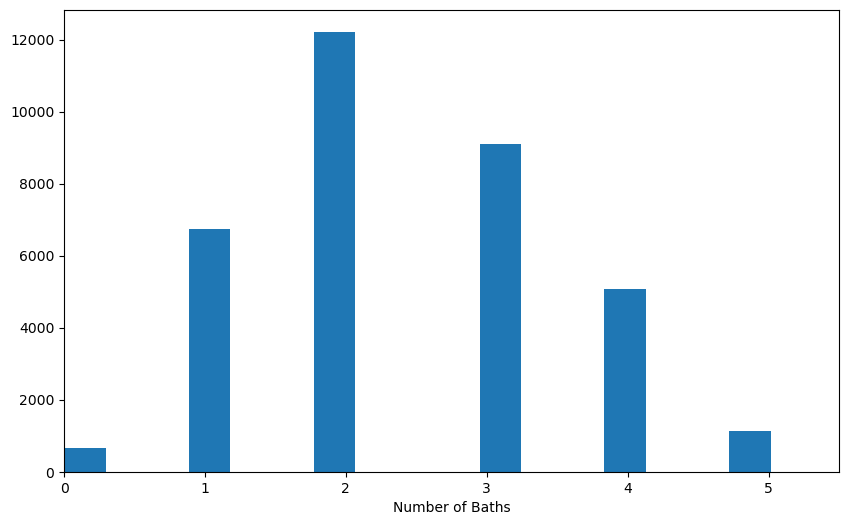

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Number_Baths'], bins=200)
plt.xlim(0, 5.5)
plt.xlabel('Number of Baths')
plt.show()

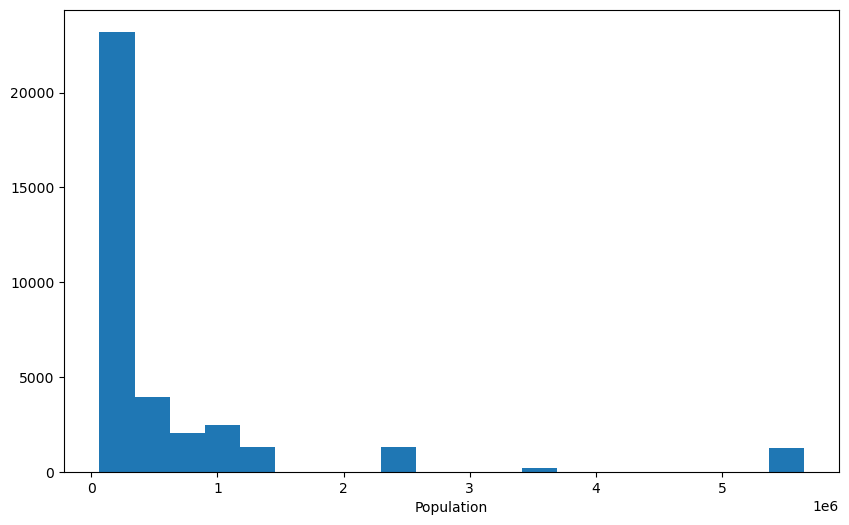

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Population'], bins=20)
plt.xlabel('Population')
plt.show()

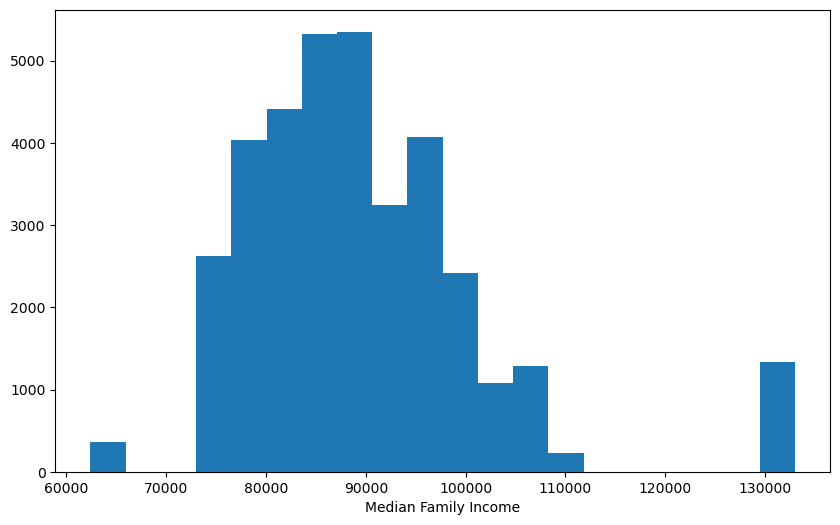

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Median_Family_Income'], bins=20)
plt.xlabel('Median Family Income')
plt.show()

In [15]:
df['Address'].nunique(), len(df['Address'])

# There are too many unique values here so we have to remove this column

(31379, 35768)

In [16]:
df.drop('Address', axis=1, inplace=True)
df.drop('Population', axis=1, inplace=True)

In [17]:
df.head()

,City,Price,Number_Beds,Number_Baths,Province,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,Ontario,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,Ontario,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,Ontario,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,Ontario,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,Ontario,43.7417,-79.3733,97000.0


In [18]:
df.drop('Province', axis=1, inplace=True)

# I discarded this column because we have the latitude longitude and city column.

<Axes: xlabel='Price'>

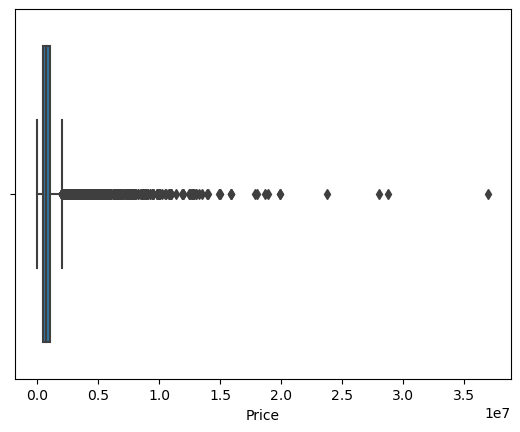

In [19]:
import seaborn as sns

sns.boxplot(x = df['Price'])

In [20]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

low_bound = Q1 - 1.5 * IQR
high_bound = Q3 + 1.5 * IQR

outlier = df[(df['Price'] < low_bound) | (df['Price'] > high_bound)]

outlier.shape

# There are too many outliers, so I decided to remove them.

(2470, 7)

In [21]:
df = df[(df['Price'] >= low_bound) & (df['Price'] <= high_bound)]


In [22]:
df.shape

(33298, 7)

In [23]:
df.head()

,City,Price,Number_Beds,Number_Baths,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,43.7417,-79.3733,97000.0


In [24]:
df = pd.get_dummies(df)

In [25]:
df.head()

,Price,Number_Beds,Number_Baths,Latitude,Longitude,Median_Family_Income,City_Abbotsford,City_Airdrie,City_Barrie,City_Brantford,...,City_St. John's,City_Sudbury,City_Thunder Bay,City_Toronto,City_Trois-Rivieres,City_Vancouver,City_Victoria,City_White Rock,City_Windsor,City_Winnipeg
0,779900.0,3,2,43.7417,-79.3733,97000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,799999.0,3,1,43.7417,-79.3733,97000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,799900.0,2,2,43.7417,-79.3733,97000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1200000.0,4,2,43.7417,-79.3733,97000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,668800.0,1,1,43.7417,-79.3733,97000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df.corr()['Price'].sort_values()

City_Regina             -0.239957
Latitude                -0.209222
City_Saskatoon          -0.165189
City_Edmonton           -0.164042
City_Saint John         -0.107251
City_St. John's         -0.103998
Longitude               -0.098332
City_Winnipeg           -0.088871
City_Moncton            -0.082656
City_Lethbridge         -0.079769
City_Red Deer           -0.066827
City_Medicine Hat       -0.065113
City_Calgary            -0.064192
City_Quebec             -0.056560
City_Sault Ste. Marie   -0.053997
City_Prince George      -0.053643
City_Thunder Bay        -0.051831
City_Sherbrooke         -0.044395
City_Windsor            -0.043305
City_Trois-Rivieres     -0.042959
City_Sudbury            -0.036255
City_Ottawa             -0.016892
City_Airdrie            -0.015398
City_Halifax            -0.011487
City_Kingston           -0.008235
City_Kamloops           -0.005810
City_Peterborough       -0.004292
City_Nanaimo             0.002971
City_London              0.008218
City_Kitchener

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [28]:
X_train, Y_train

(       Number_Beds  Number_Baths  Latitude  Longitude  Median_Family_Income  \
 33340            3             2   50.4547  -104.6067               90000.0   
 24187            4             2   50.6761  -120.3408               87000.0   
 16172            4             4   50.4547  -104.6067               90000.0   
 2584             4             3   49.2500  -123.1000               90000.0   
 30689            3             2   43.8667   -79.8667              133000.0   
 ...            ...           ...       ...        ...                   ...   
 13189            4             4   48.4283  -123.3647               85000.0   
 6277             1             1   45.4247   -75.6950               98000.0   
 8682             1             1   43.4186   -80.4728               92000.0   
 18765            1             1   49.8881  -119.4956               85000.0   
 18959            5             3   49.8881  -119.4956               85000.0   
 
        City_Abbotsford  City_Airdrie 

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [94]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [95]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Y_pred = regr.predict(X_test_scaled)

mae = mean_absolute_error(Y_test, Y_pred)
print(mae)

197954.78547167752


In [86]:
from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, Y_pred)

r_squared 

0.5827581233741531

In [87]:
mean_squared_error(Y_test, Y_pred)

75067856468.23682

In [88]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=20)

knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)

In [89]:
mean_absolute_error(Y_test, Y_pred)

181393.87685003004

In [38]:
r2_score(Y_test, Y_pred)

0.6366759228256335

In [39]:
mean_squared_error(Y_test, Y_pred)

65367263461.99739

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=10)

knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)

In [41]:
mean_absolute_error(Y_test, Y_pred)

186594.92919555554

In [42]:
r2_score(Y_test, Y_pred)

0.6186057885165318

In [43]:
mean_squared_error(Y_test, Y_pred)

68618342331.757645

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=30)

knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)

In [45]:
mean_absolute_error(Y_test, Y_pred)

179552.14031931933

In [46]:
r2_score(Y_test, Y_pred)

0.6386535867410237

In [47]:
mean_squared_error(Y_test, Y_pred)

65011453081.35322

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [49]:
mean_absolute_error(Y_test, Y_pred)

177782.346345739

In [50]:
r2_score(Y_test, Y_pred)

0.6429239671490397

In [51]:
mean_squared_error(Y_test, Y_pred)

64243149798.55218

In [52]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf", C=100, epsilon=0.1)

svr.fit(X_train, Y_train)

Y_pred = svr.predict(X_test)

In [53]:
mean_absolute_error(Y_test, Y_pred)

323918.0638650858

In [54]:
r2_score(Y_test, Y_pred)

-0.032346771587440815

In [55]:
mean_squared_error(Y_test, Y_pred)

185734135561.0541

In [56]:
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modelini oluşturma ve eğitme
svr = SVR(kernel="linear", C=100, epsilon=0.1)
svr.fit(X_train_scaled, Y_train)

# Test verisi üzerinde tahmin yapma
Y_pred = svr.predict(X_test_scaled)


In [57]:
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modelini oluşturma ve eğitme
svr = SVR(kernel="linear", C=100, epsilon=0.1)
svr.fit(X_train_scaled, Y_train)

# Test verisi üzerinde tahmin yapma
Y_pred = svr.predict(X_test_scaled)


In [58]:
mean_absolute_error(Y_test, Y_pred)

193449.4444525476

In [59]:
r2_score(Y_test, Y_pred)

0.548538444041105

In [60]:
mean_squared_error(Y_test, Y_pred)

81224472379.69736

In [61]:
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modelini oluşturma ve eğitme
svr = SVR(kernel="linear", C=1000, epsilon=0.1)
svr.fit(X_train_scaled, Y_train)

# Test verisi üzerinde tahmin yapma
Y_pred = svr.predict(X_test_scaled)


In [62]:
mean_absolute_error(Y_test, Y_pred)

192565.16845748798

In [63]:
r2_score(Y_test, Y_pred)

0.5619347421131871

In [64]:
mean_squared_error(Y_test, Y_pred)

78814284339.57751

In [65]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000,
                             early_stopping=True, validation_fraction=0.1)
mlp_regressor.fit(X_train_scaled, Y_train)

Y_pred = mlp_regressor.predict(X_test_scaled)

In [66]:
mean_absolute_error(Y_test, Y_pred)

191362.4509437336

In [67]:
r2_score(Y_test, Y_pred)

0.601017983046231

In [68]:
mean_squared_error(Y_test, Y_pred)

71782643257.90784

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train_scaled, Y_train)

Y_pred = gb_regressor.predict(X_test_scaled)

In [70]:
mean_absolute_error(Y_test, Y_pred)

182554.97360555318

In [71]:
r2_score(Y_test, Y_pred)

0.634072699835688

In [72]:
mean_squared_error(Y_test, Y_pred)

65835620980.049866

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train_scaled, Y_train)

Y_pred = gb_regressor.predict(X_test_scaled)

In [74]:
mean_absolute_error(Y_test, Y_pred)

176008.67849125416

In [75]:
r2_score(Y_test, Y_pred)

0.6517916599786384

In [76]:
mean_squared_error(Y_test, Y_pred)

62647723428.79286

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42)
gb_regressor.fit(X_train_scaled, Y_train)

Y_pred = gb_regressor.predict(X_test_scaled)

In [78]:
mean_absolute_error(Y_test, Y_pred)

177967.16103583967

In [79]:
r2_score(Y_test, Y_pred)

0.6396625138755077

In [81]:
mean_squared_error(Y_test, Y_pred)

64829932477.69084